In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('BP_data.csv')   # CSV 파일 로드

print(df.head())                  # 앞 5개 행 출력
print(df.columns)                 # 컬럼 목록 확인
print(df.info())                  # 컬럼별 데이터 타입 + 결측치 확인
print(df.describe())    

   Patient_Number  Blood_Pressure_Abnormality  Level_of_Hemoglobin  \
0               1                           1                11.28   
1               2                           0                 9.75   
2               3                           1                10.79   
3               4                           0                11.00   
4               5                           1                14.17   

   Genetic_Pedigree_Coefficient  Age  BMI  Sex  Pregnancy  Smoking  \
0                          0.90   34   23    1        1.0        0   
1                          0.23   54   33    1        NaN        0   
2                          0.91   70   49    0        NaN        0   
3                          0.43   71   50    0        NaN        0   
4                          0.83   52   19    0        NaN        0   

   Physical_activity  salt_content_in_the_diet  alcohol_consumption_per_day  \
0              45961                     48071                          NaN   


In [3]:
print(df.head())                  # 앞 5개 행 출력


   Patient_Number  Blood_Pressure_Abnormality  Level_of_Hemoglobin  \
0               1                           1                11.28   
1               2                           0                 9.75   
2               3                           1                10.79   
3               4                           0                11.00   
4               5                           1                14.17   

   Genetic_Pedigree_Coefficient  Age  BMI  Sex  Pregnancy  Smoking  \
0                          0.90   34   23    1        1.0        0   
1                          0.23   54   33    1        NaN        0   
2                          0.91   70   49    0        NaN        0   
3                          0.43   71   50    0        NaN        0   
4                          0.83   52   19    0        NaN        0   

   Physical_activity  salt_content_in_the_diet  alcohol_consumption_per_day  \
0              45961                     48071                          NaN   


In [4]:
print(df.columns)                 # 컬럼 목록 확인


Index(['Patient_Number', 'Blood_Pressure_Abnormality', 'Level_of_Hemoglobin',
       'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Sex', 'Pregnancy',
       'Smoking', 'Physical_activity', 'salt_content_in_the_diet',
       'alcohol_consumption_per_day', 'Level_of_Stress',
       'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders'],
      dtype='object')


In [5]:
print(df.info())                  # 컬럼별 데이터 타입 + 결측치 확인


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Patient_Number                 2000 non-null   int64  
 1   Blood_Pressure_Abnormality     2000 non-null   int64  
 2   Level_of_Hemoglobin            2000 non-null   float64
 3   Genetic_Pedigree_Coefficient   1908 non-null   float64
 4   Age                            2000 non-null   int64  
 5   BMI                            2000 non-null   int64  
 6   Sex                            2000 non-null   int64  
 7   Pregnancy                      442 non-null    float64
 8   Smoking                        2000 non-null   int64  
 9   Physical_activity              2000 non-null   int64  
 10  salt_content_in_the_diet       2000 non-null   int64  
 11  alcohol_consumption_per_day    1758 non-null   float64
 12  Level_of_Stress                2000 non-null   i

In [7]:
print(df.isnull().sum())         # 결측치 개수 확인
print((df == 0).sum())           # 0값이 결측치로 간주될 수 있는 경우




Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64
Patient_Number                      0
Blood_Pressure_Abnormality       1013
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       17
Age                                 0
BMI                                 0
Sex                              1008
Pregnancy                         243
Smoking                           981
Physical_activity                   0
salt_content_in_the_diet            0

In [8]:
df['Genetic_Pedigree_Coefficient'] = df['Genetic_Pedigree_Coefficient'].fillna(df['Genetic_Pedigree_Coefficient'].median())

In [9]:
df['alcohol_consumption_per_day'] = df['alcohol_consumption_per_day'].fillna(df['alcohol_consumption_per_day'].median())

In [10]:
df = df.drop(columns=['Pregnancy'])

In [11]:
df['BMI'] = df['BMI'].replace(0, np.nan)
df['BMI'] = df['BMI'].fillna(df['BMI'].median())

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols = [
    'Level_of_Hemoglobin',
    'Genetic_Pedigree_Coefficient',
    'Age',
    'BMI',
    'Physical_activity',
    'salt_content_in_the_diet',
    'alcohol_consumption_per_day'
]

df[num_cols] = scaler.fit_transform(df[num_cols])

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop('Blood_Pressure_Abnormality'
, axis=1)
y = df['Blood_Pressure_Abnormality'
]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

/opt/anaconda3/envs/ai_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
 [[172  51]
 [ 53 124]]


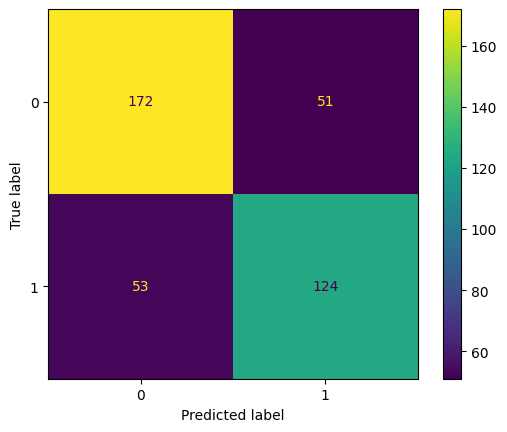

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. 모델 정의 및 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 2. 예측 수행
y_pred = model.predict(X_test)

# 3. Confusion Matrix 출력
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# 4. 시각화 (선택)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [18]:
# # 예측 결과 확률값 (output은 시그모이드 통과)
# output = model(X_test_tensor)

# # 예측 → 클래스 (0 또는 1)
# y_pred = (output > 0.5).int().numpy().flatten()
# y_true = y_test_tensor.numpy().flatten()

# # Confusion Matrix
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_true, y_pred)
# print("Confusion Matrix:\n", cm)

🔹 Confusion Matrix:
[[172  51]
 [ 50 127]]
🔹 정확도 (Accuracy): 0.7475
🔹 정밀도 (Precision): 0.7135
🔹 재현율 (Recall): 0.7175
🔹 F1 스코어: 0.7155

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       223
           1       0.71      0.72      0.72       177

    accuracy                           0.75       400
   macro avg       0.74      0.74      0.74       400
weighted avg       0.75      0.75      0.75       400



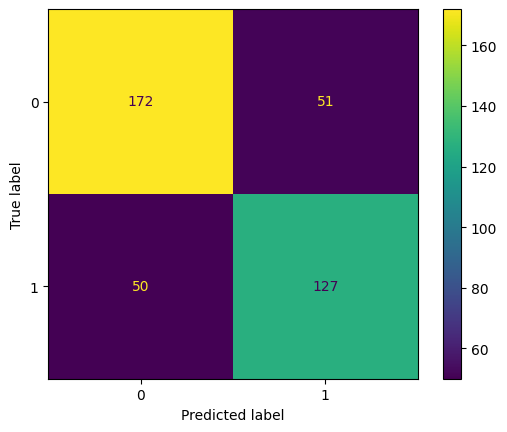

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)

# 1. 모델 정의 및 학습
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 2. 예측 수행
y_pred = model.predict(X_test)

# 3. Confusion Matrix 계산 및 출력
cm = confusion_matrix(y_test, y_pred)
print("🔹 Confusion Matrix:")
print(cm)

# 4. 성능 지표 출력
print("🔹 정확도 (Accuracy):", round(accuracy_score(y_test, y_pred), 4))
print("🔹 정밀도 (Precision):", round(precision_score(y_test, y_pred), 4))
print("🔹 재현율 (Recall):", round(recall_score(y_test, y_pred), 4))
print("🔹 F1 스코어:", round(f1_score(y_test, y_pred), 4))

# 5. 전체 리포트 출력
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred))

# 6. 시각화 (선택)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

/opt/anaconda3/envs/ai_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54756 (\N{HANGUL SYLLABLE HE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ai_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ai_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44544 (\N{HANGUL SYLLABLE GEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ai_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ai_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) mis

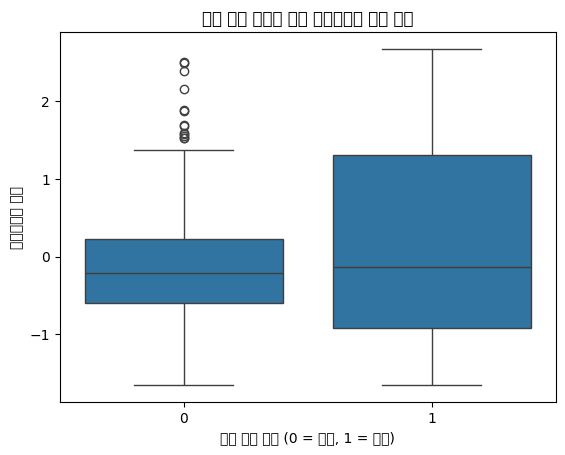

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# 예: 혈압 이상 여부에 따라 헤모글로빈 수준 비교
sns.boxplot(x='Blood_Pressure_Abnormality', y='Level_of_Hemoglobin', data=df)

plt.title('혈압 이상 유무에 따른 헤모글로빈 수치 분포')
plt.xlabel('혈압 이상 여부 (0 = 정상, 1 = 이상)')
plt.ylabel('헤모글로빈 수치')
plt.show()

/opt/anaconda3/envs/ai_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54756 (\N{HANGUL SYLLABLE HE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ai_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ai_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44544 (\N{HANGUL SYLLABLE GEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ai_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ai_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) mis

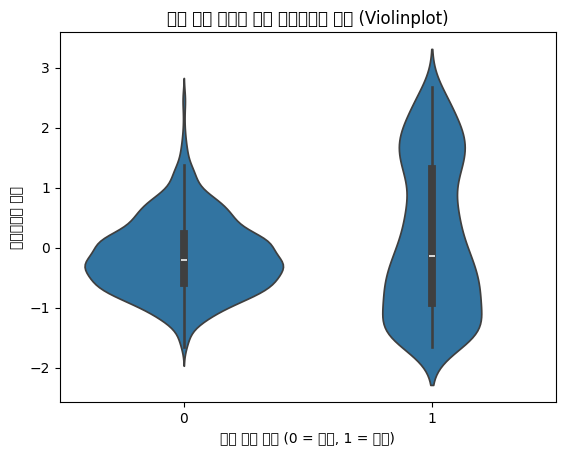

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# 예: 혈압 이상 유무에 따른 헤모글로빈 수치 분포
sns.violinplot(x='Blood_Pressure_Abnormality', y='Level_of_Hemoglobin', data=df)

plt.title('혈압 이상 유무에 따른 헤모글로빈 분포 (Violinplot)')
plt.xlabel('혈압 이상 여부 (0 = 정상, 1 = 이상)')
plt.ylabel('헤모글로빈 수치')
plt.show()

/opt/anaconda3/envs/ai_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ai_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ai_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ai_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ai_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) miss

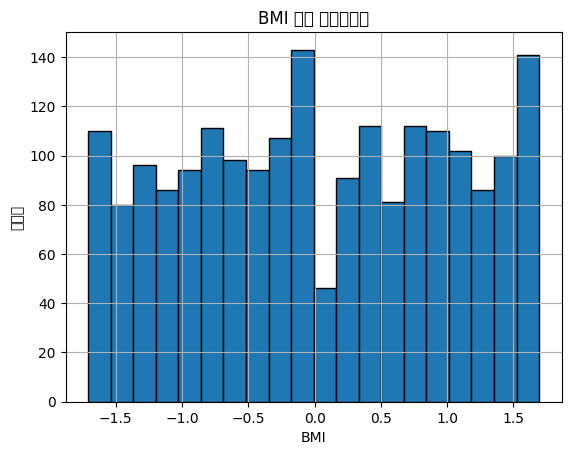

In [25]:
import matplotlib.pyplot as plt

# 예시: 'BMI' 컬럼의 히스토그램
plt.hist(df['BMI'], bins=20, edgecolor='black')

plt.title('BMI 분포 히스토그램')
plt.xlabel('BMI')
plt.ylabel('빈도수')
plt.grid(True)
plt.show()

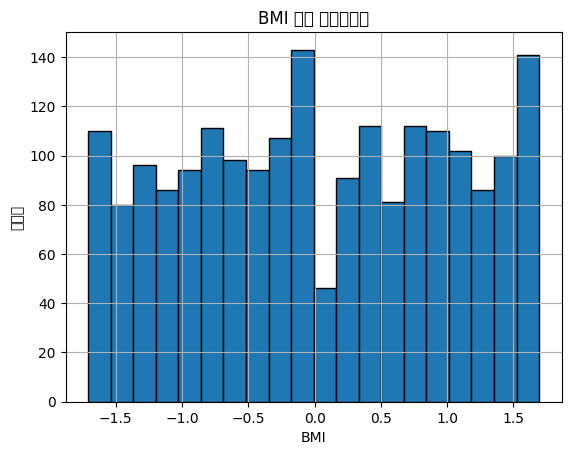

In [26]:
import matplotlib.pyplot as plt

plt.hist(df['BMI'], bins=20, edgecolor='black')
plt.title('BMI 분포 히스토그램')
plt.xlabel('BMI')
plt.ylabel('빈도수')   # 👉 요거 빠졌을 가능성 높음!
plt.grid(True)
plt.show()

/opt/anaconda3/envs/ai_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ai_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ai_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ai_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ai_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing 

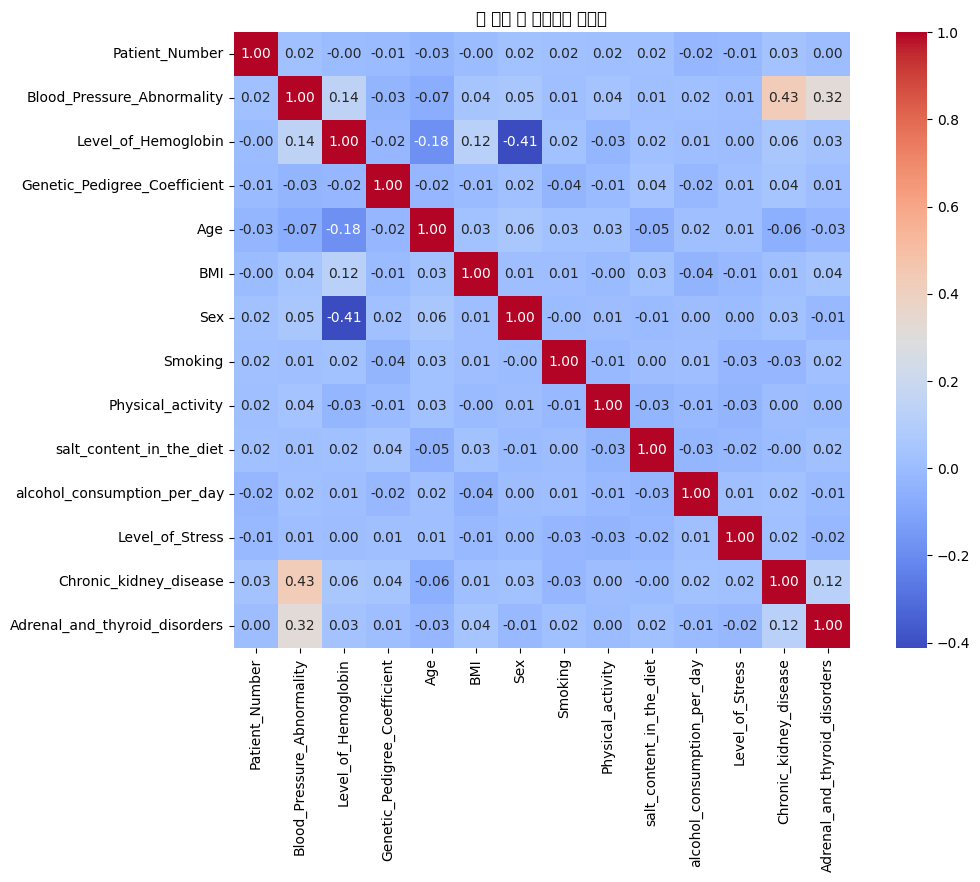

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 행렬 계산
corr = df.corr()

# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)

plt.title('📊 변수 간 상관관계 히트맵')
plt.show()

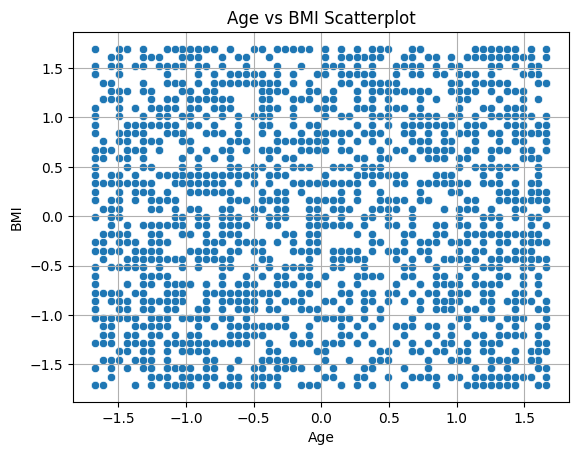

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# 예시: BMI와 나이 간의 관계 시각화
sns.scatterplot(x='Age', y='BMI', data=df)

plt.title('Age vs BMI Scatterplot')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.grid(True)
plt.show()

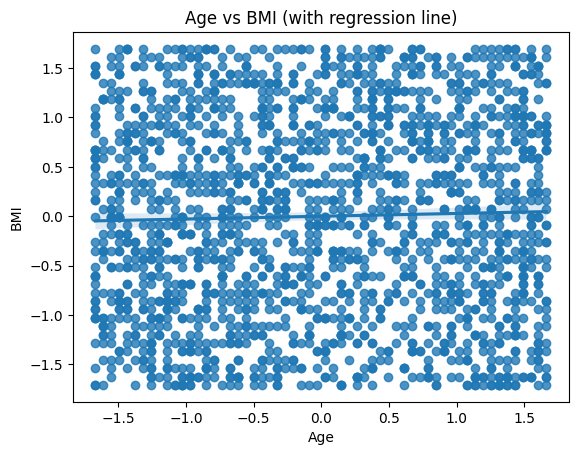

In [30]:
sns.regplot(x='Age', y='BMI', data=df)
plt.title('Age vs BMI (with regression line)')
plt.show()

/opt/anaconda3/envs/ai_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ai_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ai_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54876 (\N{HANGUL SYLLABLE HWAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ai_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ai_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}

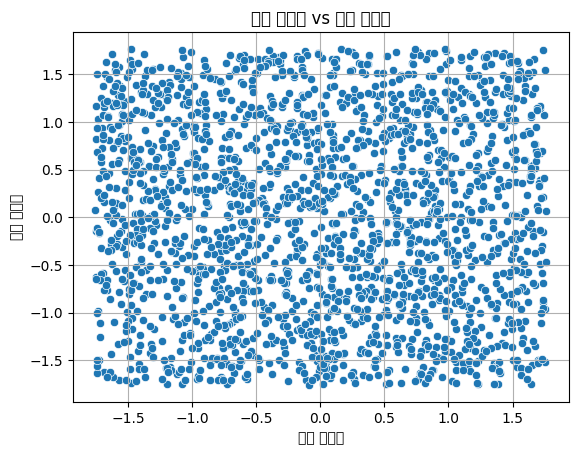

In [31]:
sns.scatterplot(x='salt_content_in_the_diet', y='Physical_activity', data=df)
plt.title('염분 섭취량 vs 신체 활동량')
plt.xlabel('염분 섭취량')
plt.ylabel('신체 활동량')
plt.grid(True)
plt.show()

/opt/anaconda3/envs/ai_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54792 (\N{HANGUL SYLLABLE HYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ai_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50517 (\N{HANGUL SYLLABLE AB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ai_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ai_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ai_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) mi

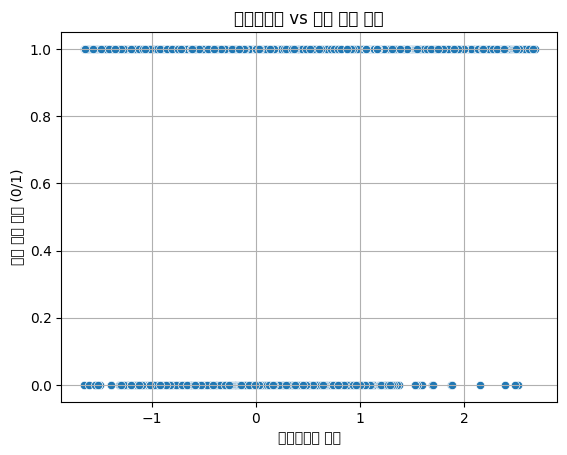

In [32]:
sns.scatterplot(x='Level_of_Hemoglobin', y='Blood_Pressure_Abnormality', data=df)
plt.title('헤모글로빈 vs 혈압 이상 유무')
plt.xlabel('헤모글로빈 수치')
plt.ylabel('혈압 이상 유무 (0/1)')
plt.grid(True)
plt.show()

/opt/anaconda3/envs/ai_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ai_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ai_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ai_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ai_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) mis

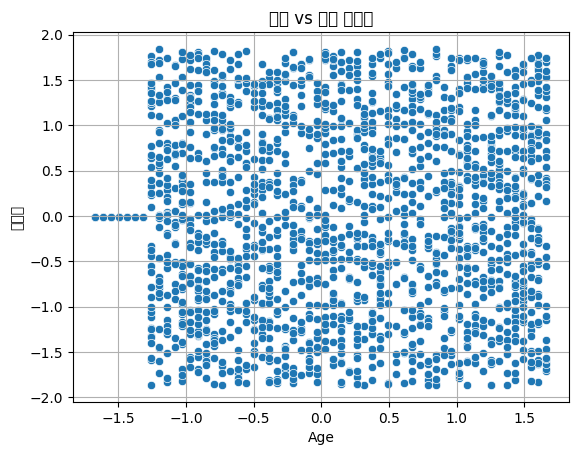

In [33]:
sns.scatterplot(x='Age', y='alcohol_consumption_per_day', data=df)
plt.title('나이 vs 하루 음주량')
plt.xlabel('Age')
plt.ylabel('음주량')
plt.grid(True)
plt.show()